In [2]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 690.7 kB/s eta 0:00:00a 0:00:01
  Installing build dependenciesdone
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 613.8 kB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.18.2-cp313-cp313-macosx_11_0_arm64.whl size=270336 sha256=45a953ad337be58683146024462f52678eee241541b057ecb7d21913aa176012
  Stored in directory: /Users/tayma/Library/Caches/pip/wheels/1c/48/cc/00b7d0e7defa21a58915654917c89eaedd32a6e614d8e4ad92
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [yfinance]2/5 [websockets]


In [10]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [2]:
tesla = yf.Ticker("TSLA")

In [3]:
tesla_data = tesla.history(period="max")

In [4]:
tesla_data.reset_index(inplace=True)

In [29]:
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [31]:

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")


tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        for row in table.tbody.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:  # avoid empty strings
                    tesla_revenue = pd.concat([
                        tesla_revenue,
                        pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                    ], ignore_index=True)
        break  

tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

print(tesla_revenue.tail())


         Date  Revenue
58 2010-09-30       31
59 2010-06-30       28
60 2010-03-31       21
61 2009-09-30       46
62 2009-06-30       27


In [32]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html.parser")

tables = soup.find_all("table")
revenue_table = None

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

rows = []
for tr in revenue_table.find_all("tr")[1:]:
    cols = tr.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        rows.append([date, revenue])

gme_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])

gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors="coerce")

gme_revenue.dropna(inplace=True)

gme_revenue.reset_index(drop=True, inplace=True)

print(gme_revenue.tail())
print(f"\nTotal rows: {len(gme_revenue)}")


         Date  Revenue
61 2010-01-31     3524
62 2009-10-31     1835
63 2009-07-31     1739
64 2009-04-30     1981
65 2009-01-31     3492

Total rows: 66


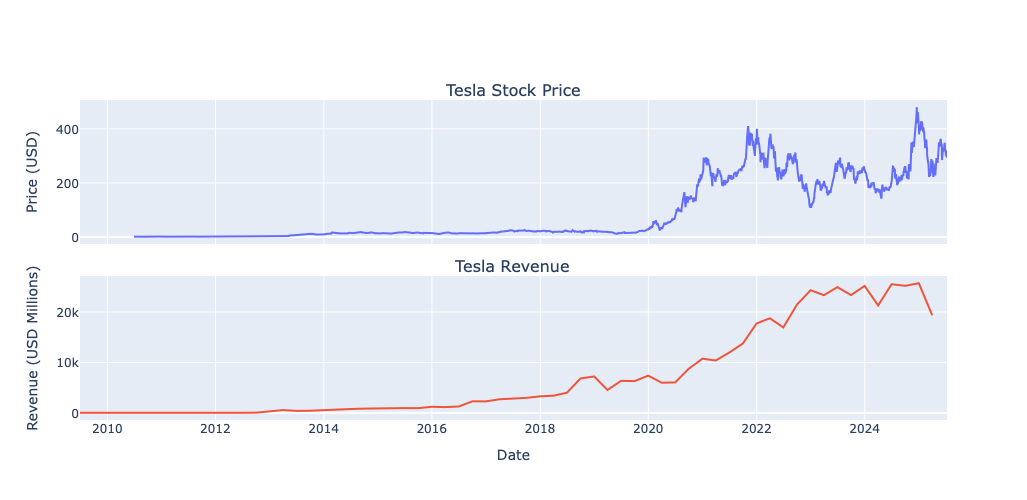

In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock_name):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        vertical_spacing=0.1,
                        subplot_titles=(f"{stock_name} Stock Price", f"{stock_name} Revenue"))

    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name="Stock Price"
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name="Revenue"
    ), row=2, col=1)

    fig.update_layout(
        height=500,
        showlegend=False
    )
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue (USD Millions)", row=2, col=1)

    fig.show()

make_graph(tesla_data, tesla_revenue, "Tesla")


In [47]:
gme_revenue = gme_revenue[gme_revenue['Revenue'].notna()]


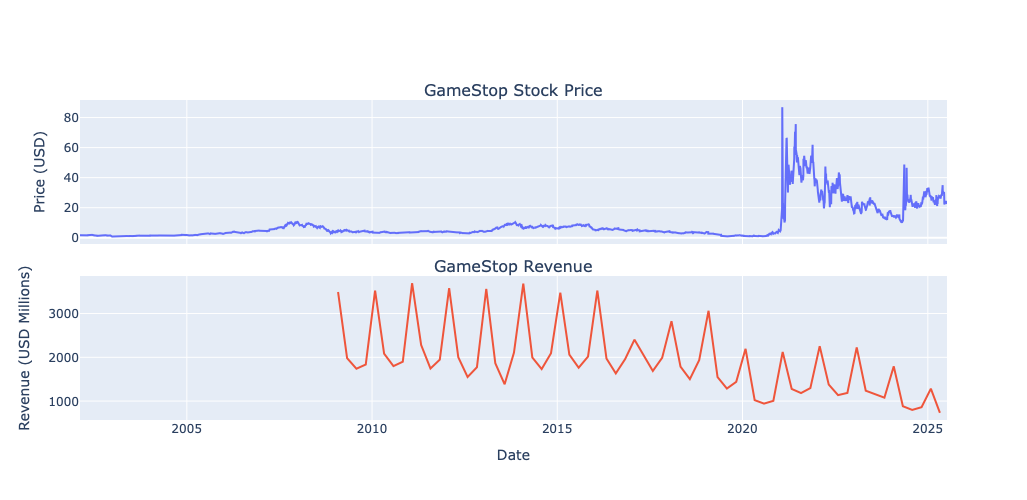

In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "html.parser")

table = next(t for t in soup.find_all("table") if "GameStop Quarterly Revenue" in str(t))

rows = [
    [td.text.strip() for td in tr.find_all("td")]
    for tr in table.find_all("tr")
    if len(tr.find_all("td")) == 2
]

gme_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])

gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors="coerce")
gme_revenue = gme_revenue.dropna(subset=["Date", "Revenue"])

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)



make_graph(gme_data, gme_revenue, "GameStop")


